# Project Overview: Red Bull Consumption and Heart Rate Analysis

## Objective
This project aims to investigate the relationship between Red Bull consumption and heart rate among participants. By analyzing data collected from a sample of Egyptian volunteers, the study seeks to determine whether there is a statistically significant difference in heart rate before and after Red Bull consumption. Additionally, the analysis will explore how demographic factors, such as age groups and gender, may influence this relationship.


## Data Source
The dataset, sourced from Kaggle and created by [Omar Sobhy](https://www.kaggle.com/datasets/omarsobhy14/redbull-and-heart-rates/data), includes the following key details:
- **Sample Size**: 120 participants (originally 281, but reduced to this number).
- **Demographics**: The dataset consists of Egyptian volunteers, categorized by sex and age group.
- **Survey Methodology**: Data was collected through face-to-face interviews over a period of approximately two months.
- **Missing Values**: There are no missing values in the dataset, ensuring complete data for analysis.
## Data Cleaning
For information on data cleaning, including an assessment of outliers, please refer to the [Data Cleaning Report](https://docs.google.com/document/d/1TxYScws7o4RyNZPbePqKXZLvqy9or45knAKnaI_dc84/edit?usp=sharing). We will check for outliers using Python.


## Loading Data

To begin the analysis, we first need to load the necessary libraries and the dataset. The following libraries will be used throughout the project:

### Required Libraries

In [40]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
from scipy import stats          # For statistical tests
import matplotlib.pyplot as plt  # For visualization
from IPython.display import Image # For showing Tableau visualizatons in notebook

In [25]:
# Load the dataset
rb_df = pd.read_csv('Redbull.csv',usecols=[0, 1, 2, 3, 4])

# Display the first few rows of the dataset to verify loading
print(rb_df.head())

   Volunteer_ID   sex agegrp  bp_before  bp_after
0             1  Male  30-45        143       153
1             2  Male  30-45        163       170
2             3  Male  30-45        153       168
3             4  Male  30-45        153       168
4             5  Male  30-45        146       161


## Outlier Detection

Before conducting the statistical analysis, it's essential to check for outliers in the heart rate measurements (both before and after Red Bull consumption). Outliers can significantly affect the results of statistical tests, so we will identify any outliers using box plots and summary statistics.

### Steps for Outlier Detection

1. **Visual Inspection**: Use box plots to visually identify any outliers in the `bp_before` and `bp_after` columns.
2. **Statistical Method**: Calculate the interquartile range (IQR) to define outliers.

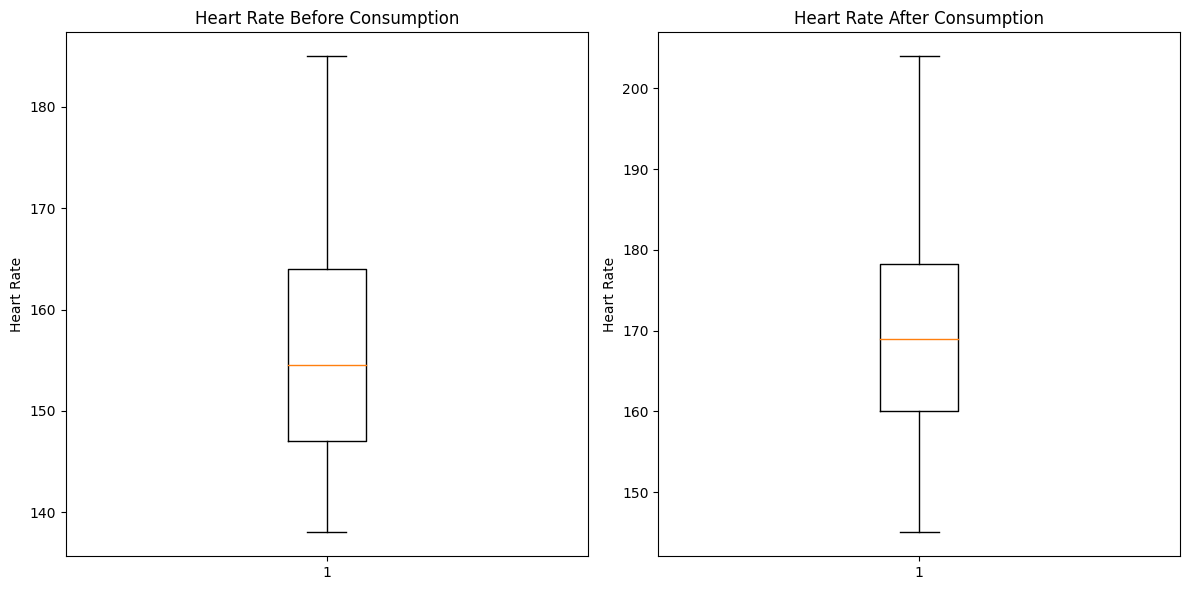

In [28]:
# Create box plots for outlier detection
plt.figure(figsize=(12, 6))

# Box plot for bp_before
plt.subplot(1, 2, 1)
plt.boxplot(rb_df['bp_before'], vert=True)
plt.title('Heart Rate Before Consumption')
plt.ylabel('Heart Rate')

# Box plot for bp_after
plt.subplot(1, 2, 2)
plt.boxplot(rb_df['bp_after'], vert=True)
plt.title('Heart Rate After Consumption')
plt.ylabel('Heart Rate')

plt.tight_layout()
plt.show()

Calculating IQR for bp_before.

In [29]:
Q1 = rb_df['bp_before'].quantile(0.25)
Q3 = rb_df['bp_before'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Identifying outliers in bp_before.

In [30]:
outliers_before = rb_df[(rb_df['bp_before'] < lower_bound) | (rb_df['bp_before'] > upper_bound)]

Calculating IQR for bp_after.

In [31]:
Q1 = rb_df['bp_after'].quantile(0.25)
Q3 = rb_df['bp_after'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Identifying outliers in bp_after.

In [32]:
outliers_after = rb_df[(rb_df['bp_after'] < lower_bound) | (rb_df['bp_after'] > upper_bound)]

Printing the results.

In [33]:
print(f"Number of outliers in bp_before: {len(outliers_before)}")
print(f"Number of outliers in bp_after: {len(outliers_after)}")

Number of outliers in bp_before: 0
Number of outliers in bp_after: 0


## Statistical Analysis

To determine if there is a statistically significant difference in heart rate before and after Red Bull consumption, we will conduct a **paired t-test**. This test is appropriate because we are comparing two related samples: the heart rates of the same participants before and after consuming Red Bull.

### Paired T-Test

1. **Import the Required Libraries**: Make sure to import the necessary libraries for statistical analysis.
2. **Perform the Paired T-Test**: We will use the `ttest_rel` function from the `scipy.stats` module to perform the test.
3. **Interpret the Results**: Analyze the t-statistic and p-value to draw conclusions about statistical significance.

In [22]:
# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(rb_df['bp_before'], rb_df['bp_after'])
# Print the results
alpha = 0.05  # Significance level
print(f"T-statistic: {t_statistic:.4f}, P-value: {p_value:.47f}")

T-statistic: -24.1523, P-value: 0.00000000000000000000000000000000000000000000001


**Interpreting the results:**

In [23]:
# Interpret the results
if p_value < alpha:
    print("There is a statistically significant difference in heart rate before and after Red Bull consumption.")
else:
    print("There is no statistically significant difference in heart rate before and after Red Bull consumption.")

There is a statistically significant difference in heart rate before and after Red Bull consumption.


### ANOVA Analysis Using Existing Age Groups

1. **Calculate the differences**: Compute the difference in heart rates for each individual (after - before).
2. **Perform ANOVA**: Use these differences to evaluate if there are significant differences across the predefined age groups.

Creating a copy of the original DataFrame and creating a new column for the difference in heart rates.

In [34]:
rb_df_cpy = rb_df.copy()
rb_df_cpy['bp_difference'] = rb_df_cpy['bp_after'] - rb_df_cpy['bp_before']

ANOVA Test on differences across existing age groups.

In [38]:
anova_result = stats.f_oneway(
    rb_df_cpy[rb_df_cpy['agegrp'] == '30-45']['bp_difference'],
    rb_df_cpy[rb_df_cpy['agegrp'] == '46-59']['bp_difference'],
    rb_df_cpy[rb_df_cpy['agegrp'] == '60+']['bp_difference']
)
print(f'ANOVA Result: F-statistic = {anova_result.statistic:.4f}, P-value = {anova_result.pvalue:.4f}')

ANOVA Result: F-statistic = 1.4289, P-value = 0.2437


**Interpreting the results:**
The F-statistic measures the ratio of the variance between the groups to the variance within the groups. A higher F-statistic indicates a greater degree of separation between group means relative to the variability within the groups. 
The P-value indicates the probability of observing the data, or something more extreme, given that the null hypothesis is true. In this case, the null hypothesis states that there are no differences in heart rate responses across the age groups.    

**P-value = 0.2437:** Since this P-value is greater than 0.05, we fail to reject the null hypothesis.
Conclusion: There is insufficient evidence to suggest that there are significant differences in heart rate responses after Red Bull consumption among the different age groups tested (e.g., 30-45, 46-59, 60+).

The results imply that the heart rate changes due to Red Bull consumption do not vary significantly among the age groups studied. This could suggest that the physiological response to Red Bull regarding heart rate is relatively consistent across these age ranges.
However, it’s important to consider the context, sample size, and any potential confounding variables that might affect the results. Further investigation or additional data might be warranted to explore this topic more thoroughly.

## Visualization in Tableau

Before starting to create visualizations in Tableau new data frame "rb_df_cpy" will be exported as new csv file for uploading it into Tableau.

In [39]:
# Save the new DataFrame to a new CSV file
rb_df_cpy.to_csv('Redbull_with_differences.csv', index=False)

### Bar Charts of Mean Heart Rates

Purpose of creating these two bar charts is to compare the average heart rates before and after consumption across different age groups.

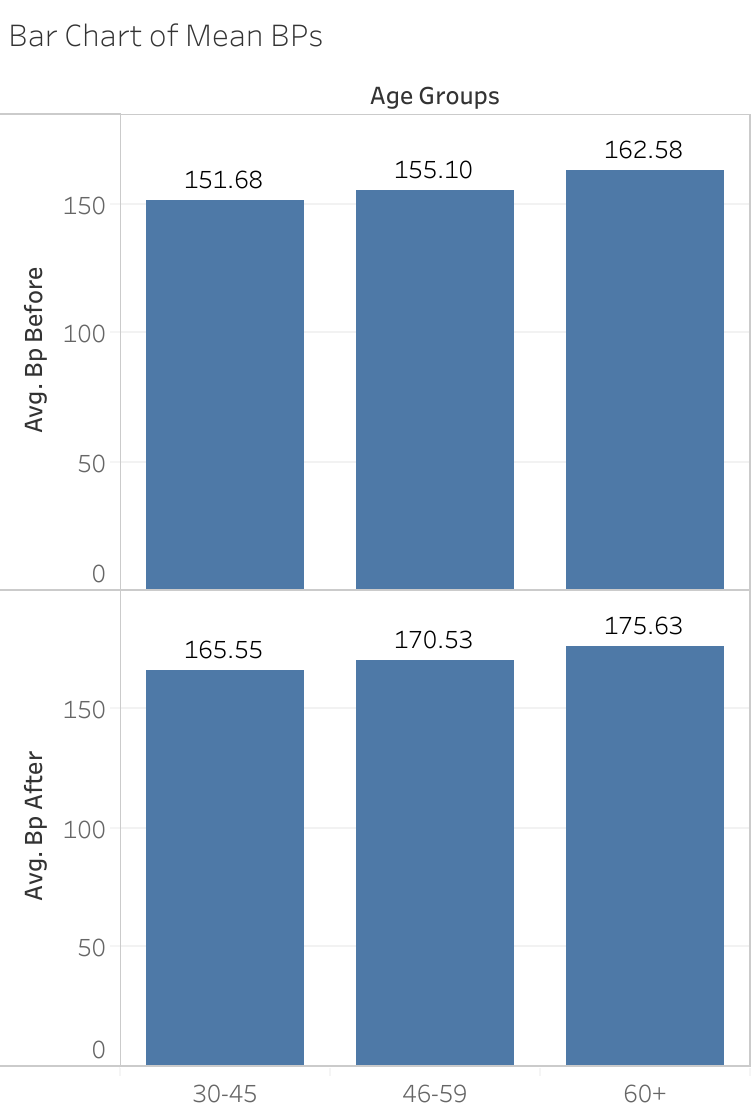

In [42]:
Image("Bar Chart of Mean BPs.png", width=400)

### Difference in Heart Rates by Age Group and Sex

Purpose of creating this heatmap is to visualize the average heart rate difference (bp_difference) by age group and sex.

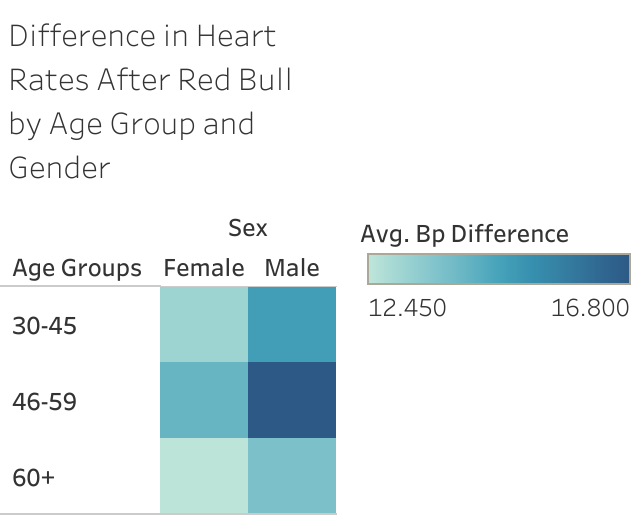

In [43]:
Image("Difference in Heart Rates After Red Bull by Age Group and Gender.png", width=400)

### Change in Heart Rate Before and After Consumption

Purpose of creating this side-by-side bar chart is to compare heart rates before and after consumption for each age group and sex.

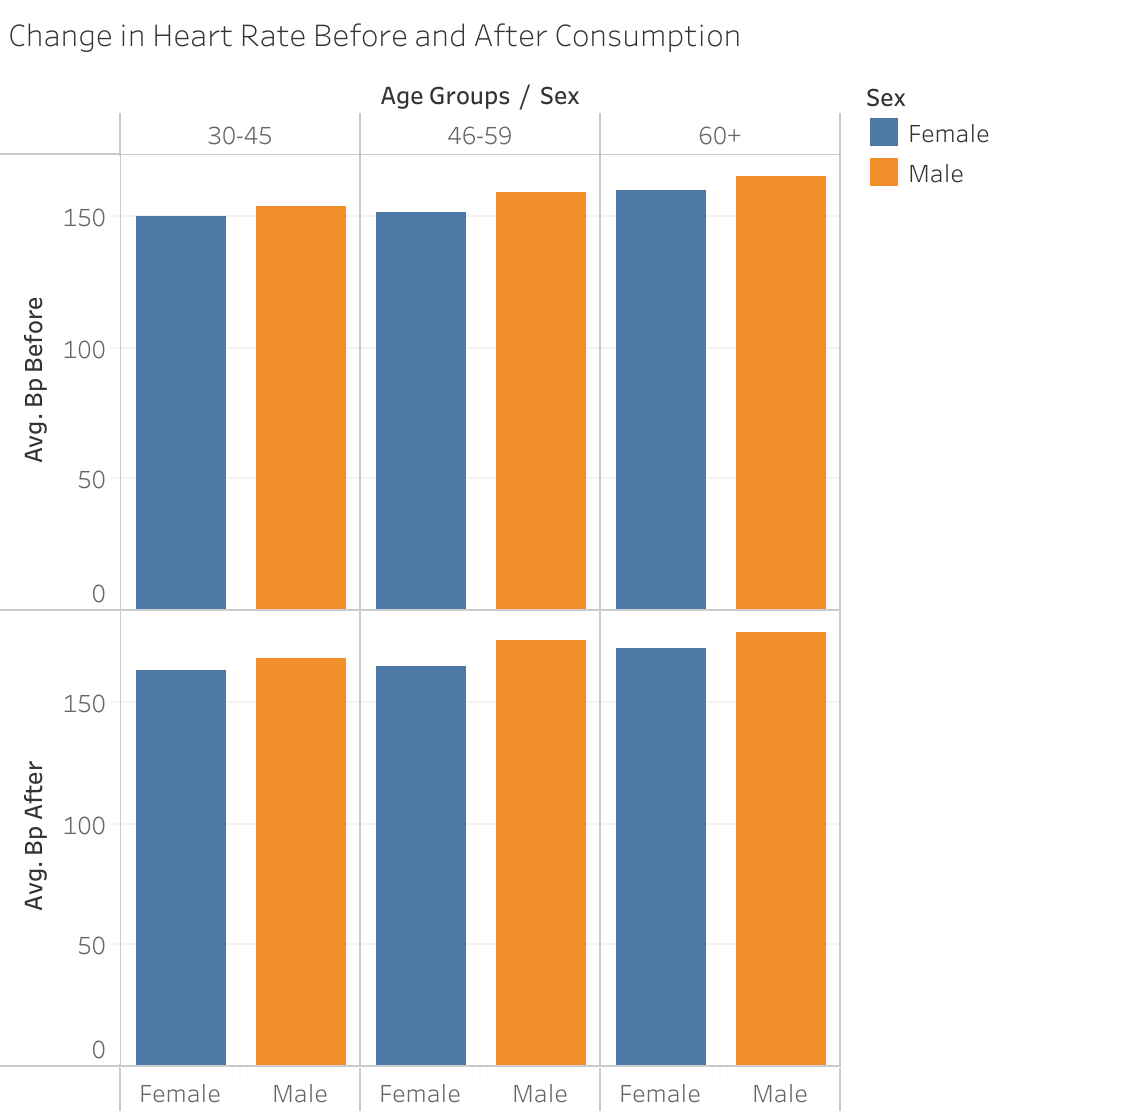

In [45]:
Image("Change in Heart Rate Before and After Consumption.png", width=500)

### Individual Changes in Heart Rate

Purpose of creating these two histograms is to display individual changes in heart rate before and after for each participant.

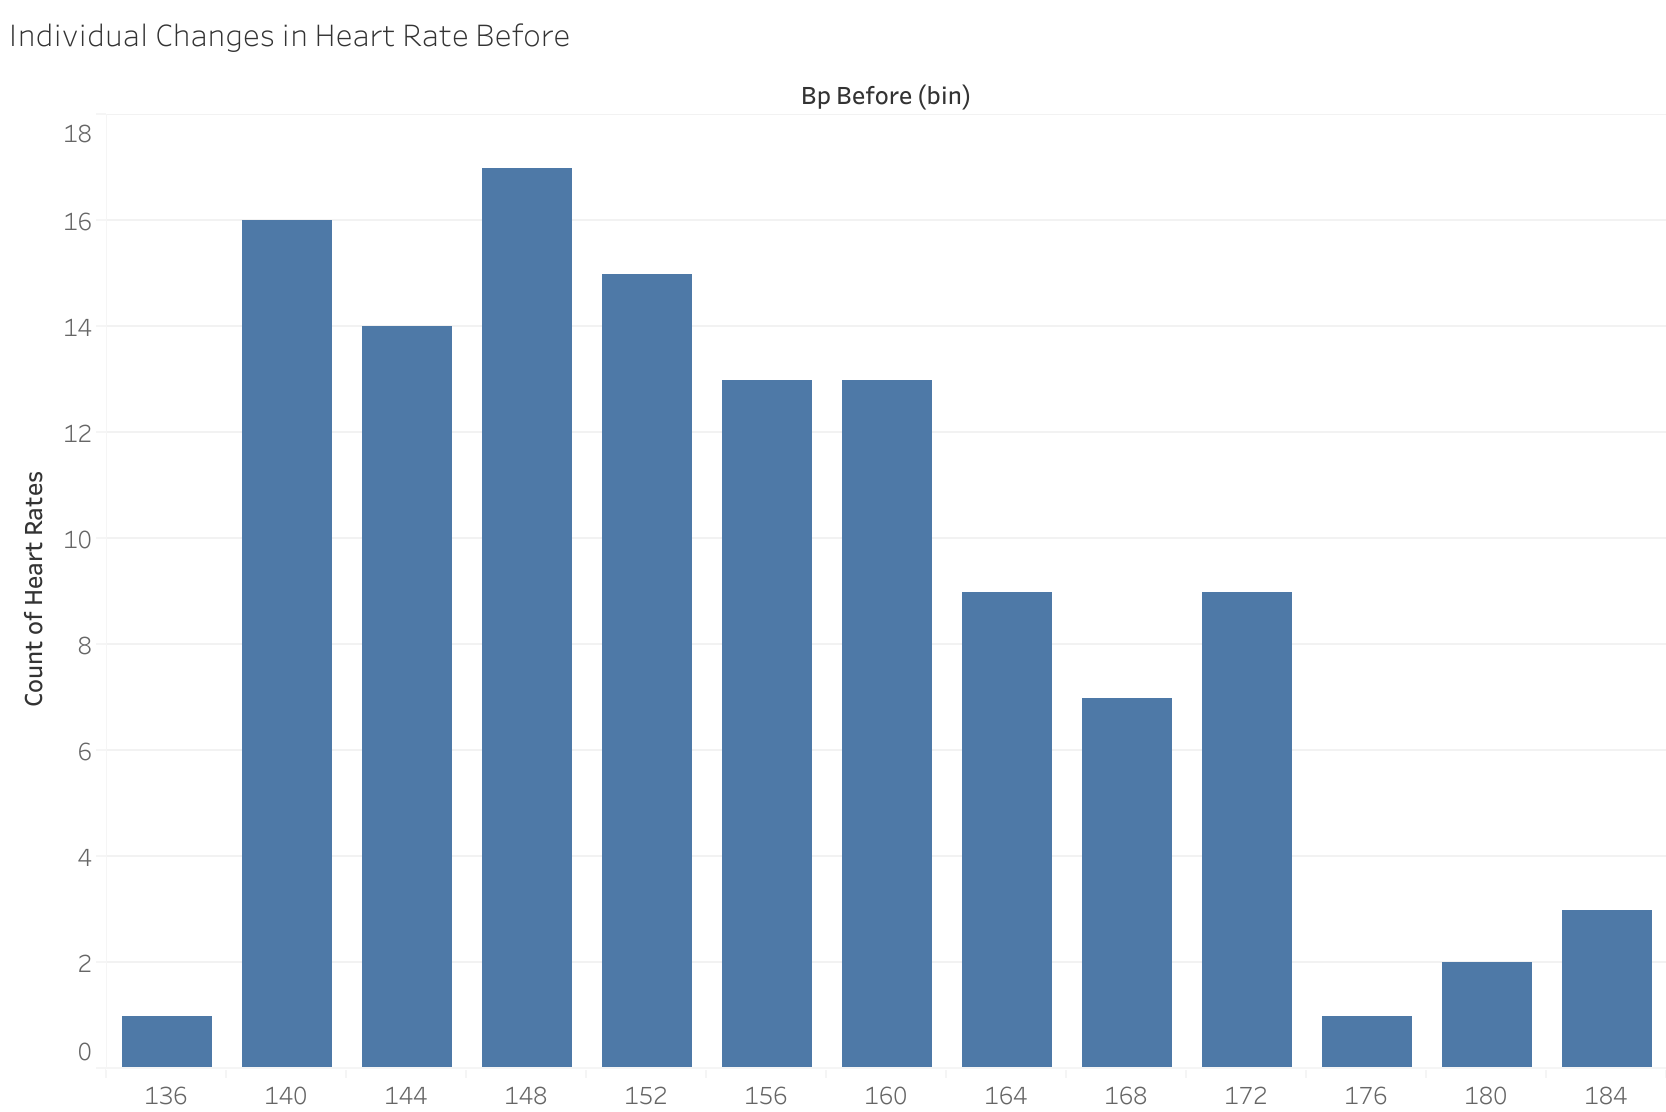

In [48]:
Image("Individual Changes in Heart Rate Before.png", width=650)

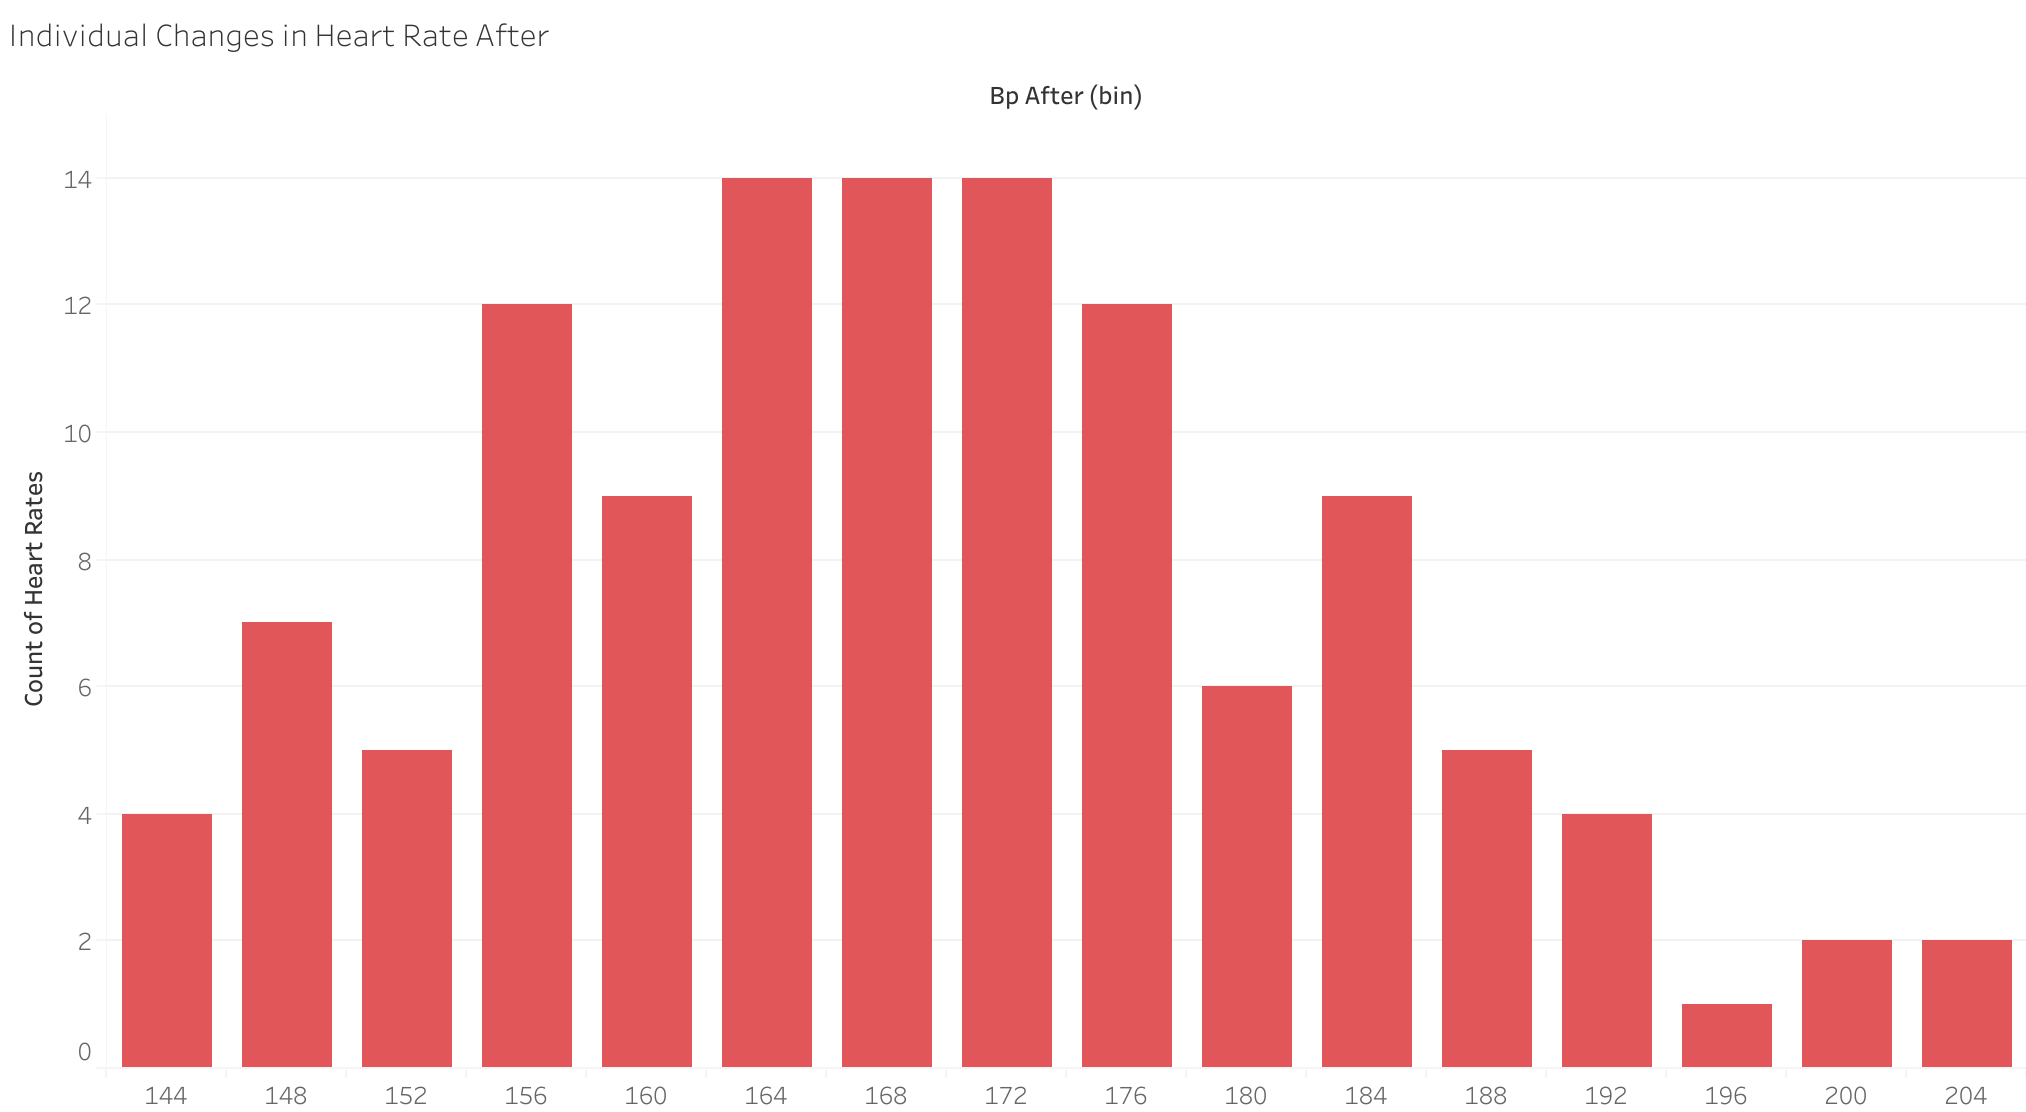

In [49]:
Image("Individual Changes in Heart Rate After.png", width=650)

### Summary Dashboard

Click to [link](https://public.tableau.com/views/RedBullandHeartRateVisualization/SummaryDashboardofRedBullConsumptionandHeartRate?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) for viewing and interacting with the dashboard.

## Conclusion

The results of our t-test indicate that there is a statistically significant difference in heart rate before and after Red Bull consumption. This finding suggests that Red Bull has a notable impact on heart rate.

On the other hand, the ANOVA results reveal that the F-statistic measures the ratio of variance between groups to variance within groups. The calculated p-value of 0.2437 is greater than the significance level of 0.05, leading us to fail to reject the null hypothesis. Consequently, there is insufficient evidence to suggest significant differences in heart rate responses after Red Bull consumption across the different age groups tested (30-45, 46-59, 60+).

These findings imply that heart rate changes due to Red Bull consumption are relatively consistent across the studied age ranges. However, it is crucial to consider the context, sample size, and potential confounding variables that could influence the results. Further investigation may be necessary to explore this topic more comprehensively.

## References

- **Original Source of Data**: [Red Bull and Heart Rates: Unleashing the Energizing Beat Within](https://www.kaggle.com/datasets/omarsobhy14/redbull-and-heart-rates)
- **Accessed on**: October 10, 2024.
- **Author of the dataset**: Omar Sobhy.